# Project 2 : Regression Analysis for House Price



## Overview
The Project is to provide business insigts about housing price in the King County to the business stakeholder 

The project has utilized public data to analyze the housing price market. Based upon the findings about Housing price and the factors of house price, recommendatios are given to the stakerholder


## Business Understanding

A real estate consulting and services company helps homeowners and other customers to buy and sell properties. 
They provide services to customers to evaluate house prices and check what factors are affecting house values.

We work on this project to provide insights to this real estate company

Business insights to investigate:
1. Estimate house values
2. What factors are affecting house price?  By how much ? 

## Data Understanding

Source of the data is the King County Housing Price dataset. The Dataset contains the house price, with other aspects of the house such as living room area, lot size , number of bedrooms, number of bathrooms etc. we will use the dataset to develop models for regression analysis

## Data Preparation
### Loading the Data

We load in the dataset. We use some data as the training data for our model, and some other data as the testing data to check model performance

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

pd.set_option('max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [110]:
df = pd.read_csv('data\\kc_house_data.csv')

In [111]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Some more information about the features of this dataset:

### Display and Explore  the Datasets

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [113]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Average house Price $540,000

### Check Missing Data 

In [114]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Check House Price Distribution

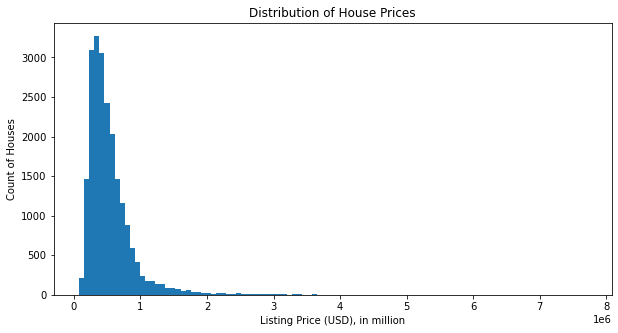

In [115]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['price'], bins=100)

ax.set_xlabel("Listing Price (USD), in million")
ax.set_ylabel("Count of Houses")
ax.set_title("Distribution of House Prices");

House Price distribution shows some outlier values

#### House Price Distribution, Box Plot

[Text(0.5, 0, 'House Price, in million')]

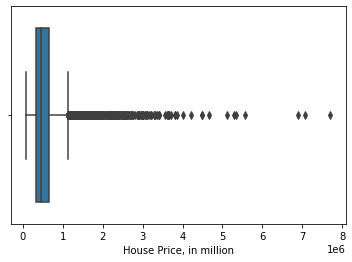

In [116]:
sns.boxplot(x='price', data=df ).set( xlabel='House Price, in million')

#### Check sqft_living variable distribution

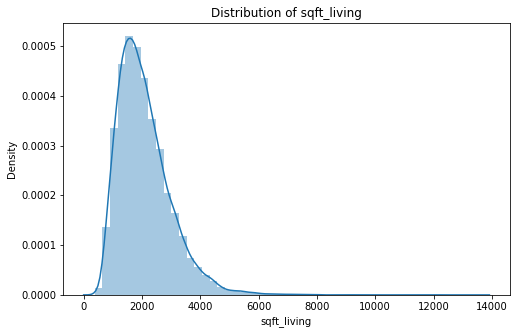

In [117]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.distplot(df['sqft_living'])
ax.set_title("Distribution of sqft_living");

#### Scatter Plot of condition

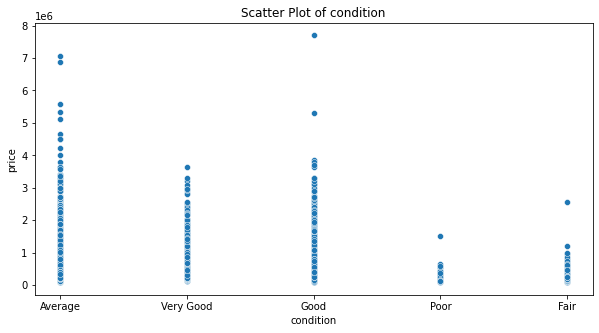

In [118]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=df, x='condition', y='price')
ax.set_title("Scatter Plot of condition");

### Other Categorical Variables

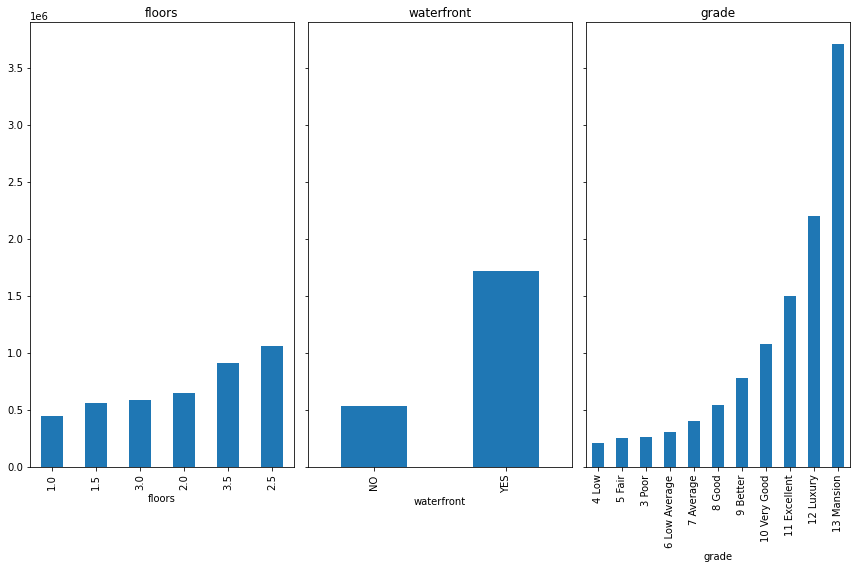

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create bar plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,8), sharey=True)

categoricals = ['floors', 'waterfront', 'grade']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

### Relevant Features

Our Team has identified the most relevant features for house price

In [120]:
features = df.columns
features

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [121]:
columns_drop = ['id', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 
               'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [122]:
df.drop(columns=columns_drop, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987


### Correlation Heatmap

Text(0.5, 1.0, 'Heatmap of Correlation Between Variables')

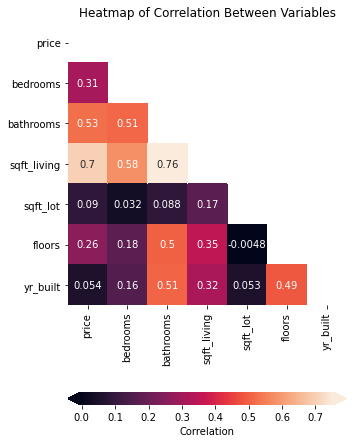

In [123]:
# compute the correlation matrix
heatmap_data = df 
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(5, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    # The mask means we only show half the values,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

ax.set_title("Heatmap of Correlation Between Variables")

From the Heatmap , the most correlated featrue with price is sqft_living

In [124]:
most_correlated_feature = "sqft_living"

### Data Preprocessing
#### Missing Values - Drop

In [125]:
df.shape

(21597, 10)

In [126]:
df.dropna(inplace=True)

In [127]:
df.shape

(19221, 10)

#### Remove Outliers

In [128]:
df=df[df['price']<1750000]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
5,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001


#### Categorical Variables Encoding

#### Encode 'condition' Variable

In [129]:
LE_condition = LabelEncoder()

In [130]:
condition_encoded = LE_condition.fit_transform(df['condition'])

In [131]:
df['condition_encoded'] = condition_encoded

#### Encode 'grade' Variable
Extract the numerical values 

In [132]:
def grade_encode(string):
    return int(string[0])

In [133]:
df['grade_encoded']= df['grade'].apply(grade_encode)

#### Encode 'waterfront' Variable

In [134]:
LE_waterfront = LabelEncoder()
df['waterfront_encoded'] = LE_waterfront.fit_transform(df['waterfront'])

#### Encode Year_built Variable
Assign each decade to a label. i.e 1950-1959 : label 5  1980-1989 : label 8 

In [135]:
def year_encode(year):
    if year<1930: 
        return 0
    elif year>=2000 and year<2011:
        return 10
    elif year>=2011:
        return 11
    else: 
        return int(str(year)[2])

In [136]:
df['yr_built_encoded']=df['yr_built'].apply(year_encode)

In [137]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,condition_encoded,grade_encoded,waterfront_encoded,yr_built_encoded
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,0,7,0,5
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,0,6,0,3
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,4,7,0,6
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,0,8,0,8
5,1230000.0,4,4.50,5420,101930,1.0,NO,Average,11 Excellent,2001,0,1,0,10


In [138]:
columns_drop = ['waterfront', 'grade', 'condition', 'yr_built']
df.drop(columns= columns_drop, inplace=True)

In [139]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition_encoded,grade_encoded,waterfront_encoded,yr_built_encoded
1,538000.0,3,2.25,2570,7242,2.0,0,7,0,5
2,180000.0,2,1.00,770,10000,1.0,0,6,0,3
3,604000.0,4,3.00,1960,5000,1.0,4,7,0,6
4,510000.0,3,2.00,1680,8080,1.0,0,8,0,8
5,1230000.0,4,4.50,5420,101930,1.0,0,1,0,10


In [140]:
df.shape

(18926, 10)

### Training Data and Testing Data

In [141]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition_encoded', 'grade_encoded', 'waterfront_encoded',
       'yr_built_encoded'],
      dtype='object')

In [142]:
Y=df['price']
X=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition_encoded', 'grade_encoded', 'waterfront_encoded',
       'yr_built_encoded']]

In [143]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition_encoded,grade_encoded,waterfront_encoded,yr_built_encoded
count,18926.000000,18926.000000,18926.000000,1.892600e+04,18926.000000,18926.000000,18926.000000,18926.000000,18926.000000
mean,3.360404,2.092730,2040.603825,1.490190e+04,1.489142,0.850893,7.015059,0.004703,6.472525
std,0.920992,0.739256,846.167014,4.037491e+04,0.539118,1.263683,1.804013,0.068415,3.197053
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,0.000000,0.000000
25%,3.000000,1.500000,1420.000000,5.014250e+03,1.000000,0.000000,7.000000,0.000000,5.000000
50%,3.000000,2.250000,1900.000000,7.560000e+03,1.500000,0.000000,7.000000,0.000000,7.000000
75%,4.000000,2.500000,2510.000000,1.050400e+04,2.000000,2.000000,8.000000,0.000000,9.000000
max,33.000000,7.500000,7620.000000,1.651359e+06,3.500000,4.000000,9.000000,1.000000,11.000000


In [144]:
### std of the encoded Variables 

lst_std=[]
for column in X.describe().columns:
    std=X.describe()[column]['std']
    lst_std.append(std)

### Dataset Train Test Split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=40)

### Feature Scaling 

In [146]:
scaler= StandardScaler()

In [147]:
X_train_scaled = scaler.fit_transform(X_train)

In [148]:
X_train_scaled

array([[-1.45864228, -1.47266711, -1.27280381, ..., -0.56548928,
        -0.06569733,  0.48244049],
       [-0.38650886,  0.55685248,  1.05628415, ...,  1.10069287,
        -0.06569733,  1.10780672],
       [ 0.68562457,  2.2481188 , -0.06688009, ...,  1.10069287,
        -0.06569733,  1.10780672],
       ...,
       [ 0.68562457,  0.21859921, -0.19693069, ..., -0.01009523,
        -0.06569733,  1.10780672],
       [-0.38650886, -1.47266711, -0.68166473, ..., -0.01009523,
        -0.06569733, -0.45560887],
       [-1.45864228, -0.79616058, -1.22551268, ..., -0.01009523,
        -0.06569733, -0.76829198]])

In [149]:
X_test_scaled = scaler.transform(X_test)

## Modeling
### Building a Baseline Model

Now, we'll build a linear regression model using just the most correlated feature, which will serve as our baseline model:

In [150]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

Then we evaluate the model using `cross_validate`, we perform 3 separate train-test splits within our `X_train` and `y_train`, then we find both the train and the test scores for each.

In [151]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.44901908790995093
Validation score: 0.4485073282167599


#### The coefficient of determination scores on both the training set and validation sets for the baseline model are about 0.44 

### 2. Build a Model with Relevant Features
     Build and Evaluate second Model , with the trasfromed featrues

In [152]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_scaled,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

In [153]:
print("Current second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()

print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current second Model
Train score:      0.5322276193151804
Validation score: 0.5287335014527756

Baseline Model
Train score:      0.44901908790995093
Validation score: 0.4485073282167599



#### Our second model got slightly better scores on both the training data and the validation data.  It seems that adding additional features will help the model to capture the relationships between the independent variables and the target


### Build and Evaluate a Final Predictive Model



We use the second model features to train our final predictive Model.  We will then evaluate the model performance on the test set

In [154]:
final_model = LinearRegression()

final_model.fit(X_train_scaled, y_train)

# Score the model on X_test_final and y_test
score=final_model.score(X_test_scaled, y_test)
print('Coefficient of Determination score', score)

Coefficient of Determination score 0.5285701284093244


## Model Prediction

In [155]:
predictions=final_model.predict(X_test_scaled)

In [156]:
d={'Price':y_test, 'Predicted Price':predictions}
data_frame=pd.DataFrame(data=d)

In [157]:
data_frame

,Price,Predicted Price
20422,530000.0,706963.963583
5784,415000.0,990927.482799
11293,1050000.0,739515.499954
9982,655000.0,650575.759705
14776,670000.0,411108.828087
...,...,...
12342,450000.0,402462.437803
15264,765000.0,691685.389436
18820,355000.0,308993.187359
17043,530000.0,462702.700391


## Model Evaluation and Interpretation
### Metrics RMSE

The previous score above is an r-squared score. Let's compute the RMSE as well, since this would be more applicable to the business audience.

In [158]:
from sklearn.metrics import mean_squared_error

print('Estimation Error')
mean_squared_error(y_test,predictions, squared=False)

Estimation Error


183580.36088270726


This means that for an average House Price, this algorithm prediction will be off by about 183580. Given that the averge house price is $540296, this prediction is not the best


### Interpret the Final Model

Below, we display the coefficients and intercept for the final model:

In [159]:
print(pd.Series(final_model.coef_, index=X_train.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

bedrooms              -34418.593619
bathrooms              35303.901476
sqft_living           182907.321046
sqft_lot               -5892.706855
floors                 35577.751546
condition_encoded      12649.665516
grade_encoded         -19775.275562
waterfront_encoded     26478.812761
yr_built_encoded      -70036.884498
Name: Coefficients, dtype: float64

Intercept: 511735.0945469917


Since the Features are scaled in the data preparation process. The coefficients are also scaled. 
we could perform the convertion.

#### Check the effect of unit change of feature on the target variable

In [160]:
coef_scaled=final_model.coef_
lst_std
coef_lst=[]
for coef, std in zip(coef_scaled,lst_std ):
    coef_lst.append(coef/std)

print('Feature Coeffeicinets after converstion\n')
print(pd.Series(coef_lst, index=X_train.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

Feature Coeffeicinets after converstion

bedrooms              -37371.213679
bathrooms              47755.971065
sqft_living              216.159834
sqft_lot                  -0.145950
floors                 65992.506014
condition_encoded      10010.159340
grade_encoded         -10961.825614
waterfront_encoded    387030.328313
yr_built_encoded      -21906.701728
Name: Coefficients, dtype: float64

Intercept: 511735.0945469917


In [161]:
s=(pd.Series(coef_lst, index=X_train.columns, name="Coefficients"))

Text(0, 0.5, 'Coefficients')

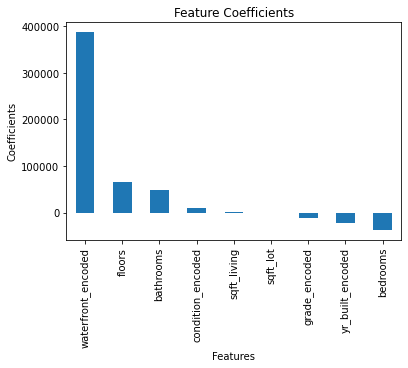

In [162]:
fig, ax = plt.subplots()
ax=s.sort_values(ascending=False).plot.bar()
ax.set_title("Feature Coefficients");
ax.set_xlabel('Features')
ax.set_ylabel('Coefficients')

#### We can see from the coefficients that the features are related to the house price, such as sqft_living,  floors, waterfront, condition etc.  These features has the positive effects on house price,  and The waterfront variable has the largest positive effect on price
If sqrt_living the area of the living room increases, the house price would increases as well. 

If there is waterfront, the house price will increase 

if the condition of house improves, its price will increase as well



The Intercept of the model is at 511735.  So the prediction of the house price is based on $511735.  Any features and variables will have the effects of chaning the housing price

Since the features are scaled, it shows that if the sqft_living, the living room areas, 
increases by one stardard deviation, 915 sqft, the house price will go up by 182907.Therefore, every increment of sqft in living room will increase the house price by $216

### Recommendations

The Business Stakeholders can focus on one or more areas to improve the housing price. 
They could focus on condition. House condition is positively related to the house price. With other factors the same, improving the house condition 
will increase the house value.  Increasing the house condition by one level may increase the house price by 10010

The business stakeholders can also focus on living room area as well. It shows a positive relationship between living room area and the house price

#### Limitations

The final model shows a coefficient of determination socre of 0.5 on the unseen  dataset.  It is not the greatest score. And therefore, the model still needs a lot of improvement to capture all the relationshps between variables. 

The model also shows a large RMSE error of 183580. Given that the average house price is at 540296,  the prediction of the house price is not the best with this large error.  Therefore, it also shows that the model needs improvement. 

The coefficients may show the effects. But the effect quantity needs to be investigated more based upon 
the model performance

### Next Steps for Modeling
 1. Use advanced non-linear models
 2. Improve model performance or develop a better model. With a good model,  Check if bringing in more data would help